In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# Reads in data files for use in readData.py

hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-north-specObj-dr14.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_south = fits.open('/Users/mtownsend/anaconda/Data/survey-dr8-south-specObj-dr14.fits')# this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr8.fits') # this is one sweep file of the DECaLS data
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr8.fits') # this is one sweep file of the DECaLS data


# hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                  # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
# hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
#                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
# hdulist4 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data


SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data

# SpecObj_data = hdulist[1].data
# SDSS_data = hdulist2[1].data
# DECaLS_data1 = hdulist3[1].data
# DECaLS_data2 = hdulist4[1].data

# id_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)

# id_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)

id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


print("end readdata")

# IMPORTANT NOTE: LRG data is the same for each.

done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4488579
done creating unique IDs for brick file
done identifying LRGs in survey brick
631147
done making survey cuts
done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4076998
done creating unique IDs for brick file
done identifying LRGs in survey brick
249137
done making survey cuts
end readdata


In [3]:
print(len(z_LRG1))
print(zflux_LRG1)
print(gflux_LRG1)
print(rflux_LRG1)

2037
[240.90738   23.652603  34.66382  ...  14.467259  16.200613  23.375597]
[34.55326    1.2215848  1.9278641 ...  1.8918967  0.7839371  0.9653975]
[115.48853     6.5234213  11.156837  ...   6.4794993   4.425533
   6.5683446]


In [17]:
# data for photometric catalog for EAZY

mw_transmission_g_LRG = mw_transmission_g_LRG1
mw_transmission_r_LRG = mw_transmission_r_LRG1
mw_transmission_z_LRG = mw_transmission_z_LRG1
mw_transmission_w1_LRG = mw_transmission_w1_LRG1
mw_transmission_w2_LRG = mw_transmission_w2_LRG1
mw_transmission_w3_LRG = mw_transmission_w3_LRG1
mw_transmission_w4_LRG = mw_transmission_w4_LRG1

flux_corr_g = mw_transmission_g_LRG
flux_corr_r = mw_transmission_r_LRG
flux_corr_z = mw_transmission_z_LRG
flux_corr_w1 = mw_transmission_w1_LRG
flux_corr_w2 = mw_transmission_w2_LRG
flux_corr_w3 = mw_transmission_w3_LRG
flux_corr_w4 = mw_transmission_w4_LRG

mw_transmission_g_LRG = mw_transmission_g_LRG1
# print(mw_transmission_g_LRG[0])
mw_transmission_r_LRG = mw_transmission_r_LRG1
mw_transmission_z_LRG = mw_transmission_z_LRG1
mw_transmission_w1_LRG = mw_transmission_w1_LRG1
mw_transmission_w2_LRG = mw_transmission_w2_LRG1
mw_transmission_w3_LRG = mw_transmission_w3_LRG1
mw_transmission_w4_LRG = mw_transmission_w4_LRG1

# flux_corr_g = 10.**((22.5 - mw_transmission_g_LRG)/2.5)
# flux_corr_r = 10.**((22.5 - mw_transmission_r_LRG)/2.5)
# flux_corr_z = 10.**((22.5 - mw_transmission_z_LRG)/2.5)
# flux_corr_w1 = 10.**((22.5 - mw_transmission_w1_LRG)/2.5)
# flux_corr_w2 = 10.**((22.5 - mw_transmission_w2_LRG)/2.5)
# flux_corr_w3 = 10.**((22.5 - mw_transmission_w3_LRG)/2.5)
# flux_corr_w4 = 10.**((22.5 - mw_transmission_w4_LRG)/2.5)

gflux = gflux_LRG1/mw_transmission_g_LRG
print(gflux_LRG1[0])
print(flux_corr_g[0])
print(gflux[0])
rflux = rflux_LRG1/mw_transmission_r_LRG
zflux = zflux_LRG1/mw_transmission_z_LRG
w1flux = w1flux_LRG1/mw_transmission_w1_LRG
w2flux = w2flux_LRG1/mw_transmission_w2_LRG
w3flux = w3flux_LRG1/mw_transmission_w3_LRG
w4flux = w4flux_LRG1/mw_transmission_w4_LRG

# ra_LRG = ra_LRG1
# dec_LRG = dec_LRG1
zmag_LRG1 = 22.5 - 2.5 * np.log10(zflux_LRG1)
cut = (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG1 <= 22.36)
zmag_LRG = zmag_LRG1[cut]
print(len(zmag_LRG))
z_LRG = z_LRG1[cut]
print(len(z_LRG))
id_LRG = id_LRG1[cut]
print(len(id_LRG))

gflux_LRG = gflux[cut]
print(len(gflux_LRG))
rflux_LRG = rflux[cut]
print(len(rflux_LRG))
zflux_LRG = zflux[cut]
print(len(zflux_LRG))
w1flux_LRG = w1flux[cut]
print(len(w1flux_LRG))
w2flux_LRG = w2flux[cut]
print(len(w2flux_LRG))
w3flux_LRG = w3flux[cut]
print(len(w3flux_LRG))
w4flux_LRG = w4flux[cut]
print(len(w4flux_LRG))
      
g_sigma = []
g_sigma = 1./np.sqrt(gflux_ivar_LRG1[cut])
print(len(g_sigma))
print(gflux_ivar_LRG1[0])
      
r_sigma = []
r_sigma = 1./np.sqrt(rflux_ivar_LRG1[cut])
print(len(r_sigma))
      
z_sigma = []
z_sigma = 1./np.sqrt(zflux_ivar_LRG1[cut])
print(len(z_sigma))
      
w1_sigma = []
w1_sigma = 1./np.sqrt(w1flux_ivar_LRG1[cut])
print(len(w1_sigma))
      
w2_sigma = []
w2_sigma = 1./np.sqrt(w2flux_ivar_LRG1[cut])
print(len(w2_sigma))
      
w3_sigma = []
w3_sigma = 1./np.sqrt(w3flux_ivar_LRG1[cut])
print(len(w3_sigma))
      
w4_sigma = []
w4_sigma = 1./np.sqrt(w4flux_ivar_LRG1[cut])
print(len(w4_sigma))
      
# print(len(g_sigma))
# print(len(gflux_ivar_LRG1))
# print('----')
# print(len(r_sigma))
# print(len(rflux_ivar_LRG1))
# print('----')
# print(len(z_sigma))
# print(len(zflux_ivar_LRG1))


# np.savetxt('/Users/mtownsend/Desktop/LRGphot.cat', np.column_stack([id_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1_ivar_LRG1, w2_ivar_LRG1, w3_ivar_LRG1, w4_ivar_LRG1, z_LRG1]))
# np.savetxt('/Users/mtownsend/Desktop/LRGphot.cat', np.column_stack([id_LRG, gflux_LRG, rflux_LRG, zflux_LRG, w1flux_LRG, w2flux_LRG, w3flux_LRG, w4flux_LRG, g_sigma, r_sigma, z_sigma, w1_sigma, w2_sigma, w3_sigma, w4_sigma, z_LRG]))


# print(id_LRG1[0])
# print(gflux_LRG1[0])
# print(rflux_LRG1[0])
# print(zflux_LRG1[0])
# print(w1flux_LRG1[0])
# print(w2flux_LRG1[0])
# print(w3flux_LRG1[0])
# print(w4flux_LRG1[0])


34.55326
0.8694739
39.740425
1823
1823
1823
1823
1823
1823
1823
1823
1823
1823
1823
79.5606
1823
1823
1823
1823
1823
1823


In [ ]:
gflux_BKG = np.concatenate([gflux_BKG1, gflux_BKG2])
rflux_BKG = np.concatenate([rflux_BKG1, rflux_BKG2])
zflux_BKG = np.concatenate([zflux_BKG1, zflux_BKG2])

gflux_ivar_BKG = np.concatenate([gflux_ivar_BKG1, gflux_ivar_BKG2])
rflux_ivar_BKG = np.concatenate([rflux_ivar_BKG1, rflux_ivar_BKG2])
zflux_ivar_BKG = np.concatenate([zflux_ivar_BKG1, zflux_ivar_BKG2])

g_sigma_BKG = []
g_sigma_BKG = 1./np.sqrt(gflux_ivar_BKG)

r_sigma_BKG = []
r_sigma_BKG = 1./np.sqrt(rflux_ivar_BKG)

z_sigma_BKG = []
z_sigma_BKG = 1./np.sqrt(zflux_ivar_BKG)

# np.savetxt('/Users/mtownsend/Desktop/BKGphot.cat', np.column_stack([gflux_BKG, rflux_BKG, zflux_BKG, g_sigma_BKG, r_sigma_BKG, z_sigma_BKG]))




In [25]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

# use for Mr and (Mg-Mr) color

data = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/LRG_OUTPUT/LRG_main_output.295-297.rf', 'r')
# data = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.80-81.rf', 'r')
lines = data.readlines()[11:]

# print(lines)

z = []
DM = []
L_rfilter = []
L_zfilter = []

for line in lines:
    p = line.split()
    z.append(float(p[1]))
    DM.append(float(p[2]))
    L_rfilter.append(float(p[5]))
    L_zfilter.append(float(p[6]))
    
print(len(DM))
print(DM[0])
print(len(L_rfilter))
print(len(L_zfilter))
# print(type(z[0]))
# zarr = np.array(z)

DM_arr = np.array(DM)
L_rfilter_arr = np.array(L_rfilter)
L_zfilter_arr = np.array(L_zfilter)


Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50


1823
39.88
1823
1823


In [8]:
data = open('/Users/mtownsend/Downloads/3dhst_master.phot.v4.1/3dhst_master.phot.v4.1.cat', 'r')
lines = data.readlines()[2:]

ra_3dhst = []
dec_3dhst = []
field = []
zpeak = []

for line in lines:
    p = line.split()
    field.append(p[1])
    ra_3dhst.append(float(p[2]))
    dec_3dhst.append(float(p[3]))
    zpeak.append(float(p[7]))
    
print(len(ra_3dhst))
print(len(dec_3dhst))
print(len(field))
    
ra_3DHST = np.array(ra_3dhst)
dec_3DHST = np.array(dec_3dhst)
field_3DHST = np.array(field)
zpeak_3DHST = np.array(zpeak)

print('COSMOS')
print(min(ra_3DHST[np.where(field_3DHST =='COSMOS')]))
print(min(dec_3DHST[np.where(field_3DHST =='COSMOS')]))
print(max(ra_3DHST[np.where(field_3DHST =='COSMOS')]))
print(max(dec_3DHST[np.where(field_3DHST =='COSMOS')]))

print('GOODS-S')
print(min(ra_3DHST[np.where(field_3DHST =='GOODS-S')]))
print(min(dec_3DHST[np.where(field_3DHST =='GOODS-S')]))
print(max(ra_3DHST[np.where(field_3DHST =='GOODS-S')]))
print(max(dec_3DHST[np.where(field_3DHST =='GOODS-S')]))

print('AEGIS')
print(min(ra_3DHST[np.where(field_3DHST =='AEGIS')]))
print(min(dec_3DHST[np.where(field_3DHST =='AEGIS')]))
print(max(ra_3DHST[np.where(field_3DHST =='AEGIS')]))
print(max(dec_3DHST[np.where(field_3DHST =='AEGIS')]))

print('GOODS-N')
print(min(ra_3DHST[np.where(field_3DHST =='GOODS-N')]))
print(min(dec_3DHST[np.where(field_3DHST =='GOODS-N')]))
print(max(ra_3DHST[np.where(field_3DHST =='GOODS-N')]))
print(max(dec_3DHST[np.where(field_3DHST =='GOODS-N')]))





207967
207967
207967
COSMOS
150.04859924
2.16901445
150.20614624
2.56017947
GOODS-S
52.98776245
-27.95974159
53.30179596
-27.65581131
AEGIS
214.57931519
52.67763138
215.30529785
53.10509491
GOODS-N
188.91560364
62.09401321
189.56134033
62.38830185


In [4]:
# calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)

print(len(zmag_LRG_nocuts))

# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
  
    
# zmag_cut_test = np.concatenate([zmag_LRG_nocuts, zmag_BKG])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1

ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# cut for zmag brighter than 22.36

ra_LRG_temp = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
dec_LRG_temp = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
id_LRG_temp = id_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
z_LRG_temp = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
gmag_LRG_temp = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rmag_LRG_temp = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
zmag_LRG_temp = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
grcolor_LRG_temp = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rzcolor_LRG_temp = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + z_LRG_temp)**-1.)
# Mz = zmag_LRG_temp - DM_arr - K_correct
# Lz = 10.**((Mz-Msun_z)/(-2.5))
# log_Lz = np.log10(Lz)

ra_LRG = ra_LRG_temp #[np.where(log_Lz > 10.5)]
dec_LRG = dec_LRG_temp # [np.where(log_Lz > 10.5)]
id_LRG = id_LRG_temp # [np.where(log_Lz > 10.5)]
z_LRG = z_LRG_temp # [np.where(log_Lz > 10.5)]

# plate_LRG = plate_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
# fiberid_LRG = fiberid_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

gmag_LRG = gmag_LRG_temp # [np.where(log_Lz > 10.5)]
rmag_LRG = rmag_LRG_temp # [np.where(log_Lz > 10.5)]
zmag_LRG = zmag_LRG_temp # [np.where(log_Lz > 10.5)]
grcolor_LRG = grcolor_LRG_temp # [np.where(log_Lz > 10.5)]
rzcolor_LRG = rzcolor_LRG_temp# [np.where(log_Lz > 10.5)]

ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, gzcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
# print(len(plate_LRG))
# print(len(fiberid_LRG))



# distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, zmag_LRG, zmag_BKG, rzcolor_LRG, rzcolor_BKG, grcolor_LRG, grcolor_BKG, edges)

# Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, zmag, rzcolor, grcolor, edges, distance_kpc, kpc_DA)




2037
1823


214.7497406
241.07328804964362
52.67950058
9.385171633151385
0
0


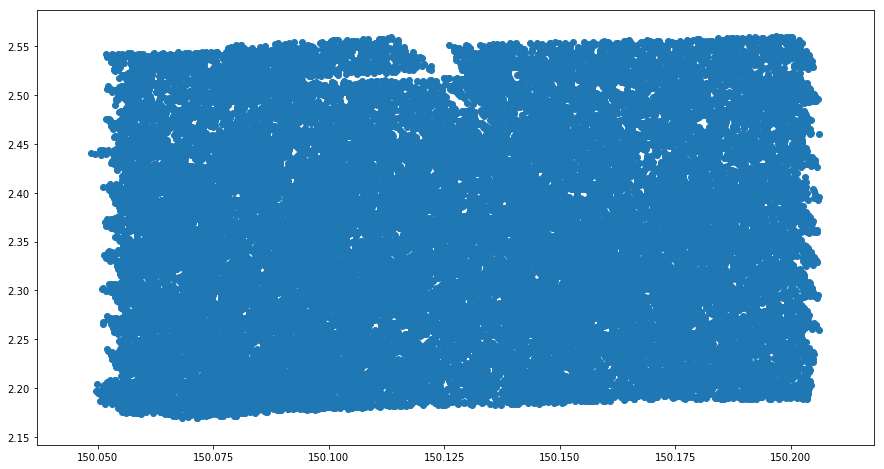

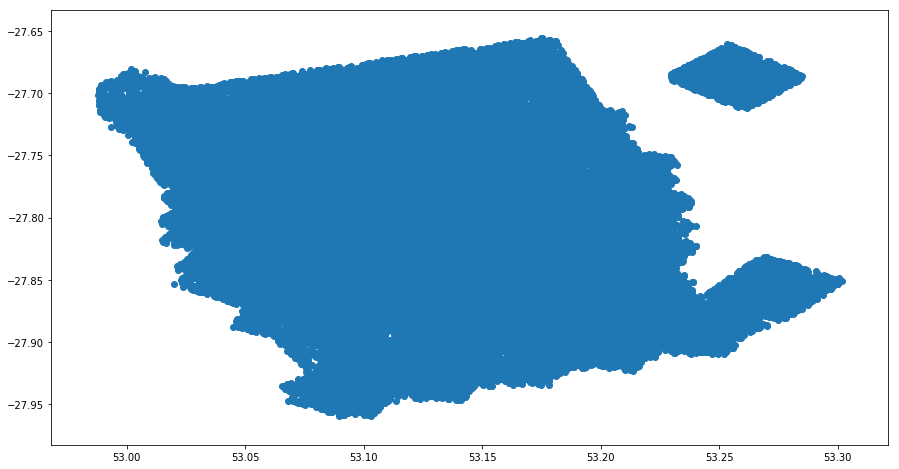

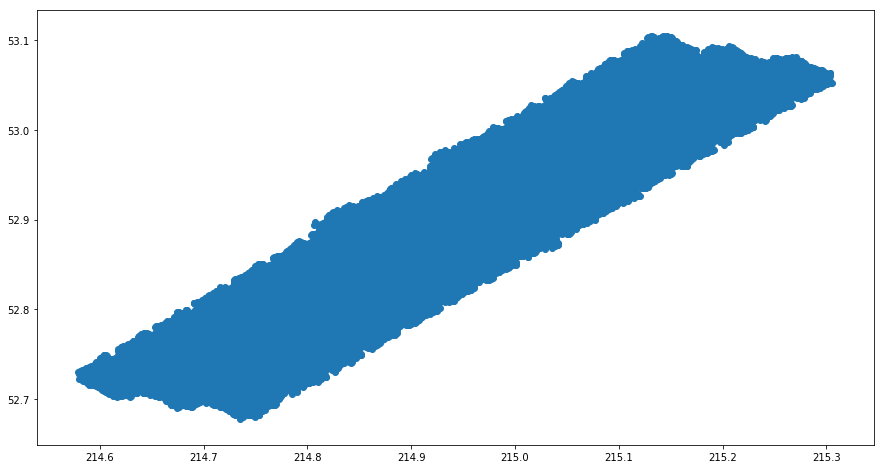

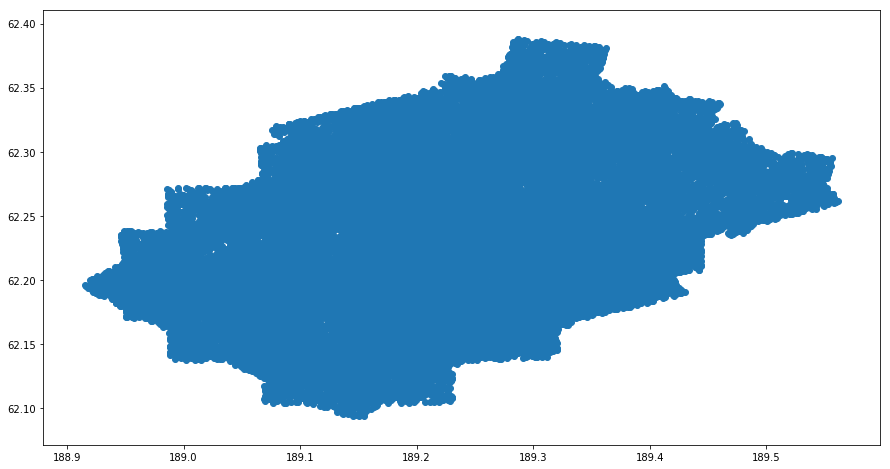

In [58]:
from astropy.coordinates import SkyCoord, match_coordinates_sky                                   
from astropy import units as u       

threedeehst_cat = SkyCoord(ra=ra_3DHST*u.degree, dec=dec_3DHST*u.degree)                          

my_cat = SkyCoord(ra=ra_LRG*u.degree, dec=dec_LRG*u.degree)                                

idx, sep2d, dist3d = match_coordinates_sky(my_cat, threedeehst_cat, nthneighbor=1)

print(ra_3DHST[idx[0]])
print(ra_LRG[0])
print(dec_3DHST[idx[0]])
print(dec_LRG[0])


ra0 = ra_3DHST[np.where((ra_3DHST >= 241) & (ra_3DHST <= 246) & (dec_3DHST >= 6.5) & (dec_3DHST <= 11.5))]
dec0 = ra_3DHST[np.where((ra_3DHST >= 241) & (ra_3DHST <= 246) & (dec_3DHST >= 6.5) & (dec_3DHST <= 11.5))]

print(len(ra0))
print(len(dec0))

plt.scatter(ra_3DHST[np.where(field_3DHST == 'COSMOS')], dec_3DHST[np.where(field_3DHST == 'COSMOS')])
plt.show()

plt.scatter(ra_3DHST[np.where(field_3DHST == 'GOODS-S')], dec_3DHST[np.where(field_3DHST == 'GOODS-S')])
plt.show()

plt.scatter(ra_3DHST[np.where(field_3DHST == 'AEGIS')], dec_3DHST[np.where(field_3DHST == 'AEGIS')])
plt.show()

plt.scatter(ra_3DHST[np.where(field_3DHST == 'GOODS-N')], dec_3DHST[np.where(field_3DHST == 'GOODS-N')])
plt.show()


minimum zmag:  13.22509
maximum zmag:  22.359999
minimum rzcolor:  -1.8027077
maximum rzcolor:  10.361477
minimum grcolor:  -6.5846786
maximum grcolor:  11.547377
0.6494109
0.49756083


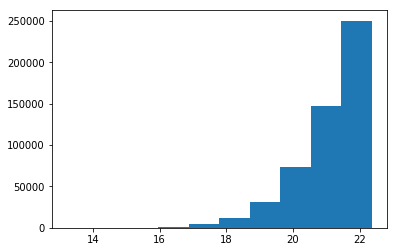

In [5]:
# zHist(z_LRG)
# plt.savefig('/Users/mtownsend/Desktop/z_LRGdist.pdf')

print("minimum zmag: ", min(zmag))
print("maximum zmag: ", max(zmag))
print("minimum rzcolor: ", min(rzcolor))
print("maximum rzcolor: ", max(rzcolor))
print("minimum grcolor: ", min(grcolor))
print("maximum grcolor: ", max(grcolor))
print(max(z_LRG))

# print(len(z_LRG[np.where(z_LRG < 0.2)]))
print(np.median(z_LRG))

plt.hist(zmag)
plt.show()

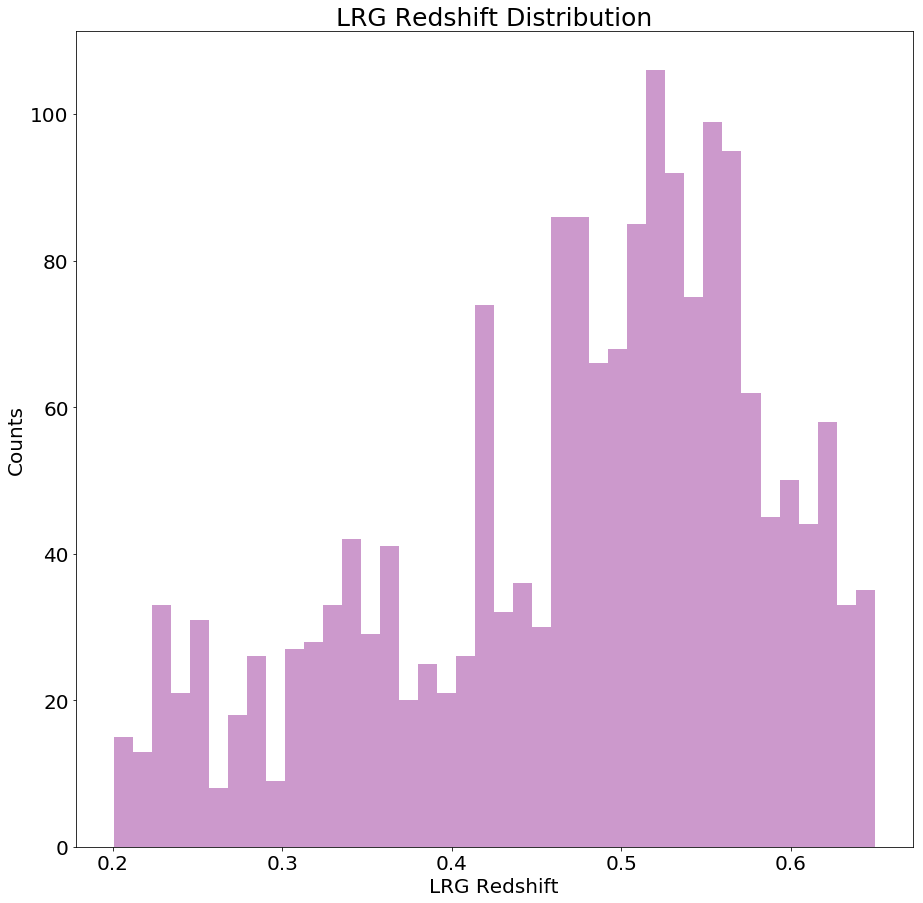

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# sns.set(color_codes=True)

plt.rcParams["figure.figsize"] = [15, 15]
sns.distplot(z_LRG, bins=40, kde=False, color='purple')
plt.title('LRG Redshift Distribution', fontsize=25)
plt.xlabel('LRG Redshift', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/z_LRGdist_v4.jpg')
# plt.savefig('/Users/mtownsend/Desktop/z_LRGdist_v3.pdf')


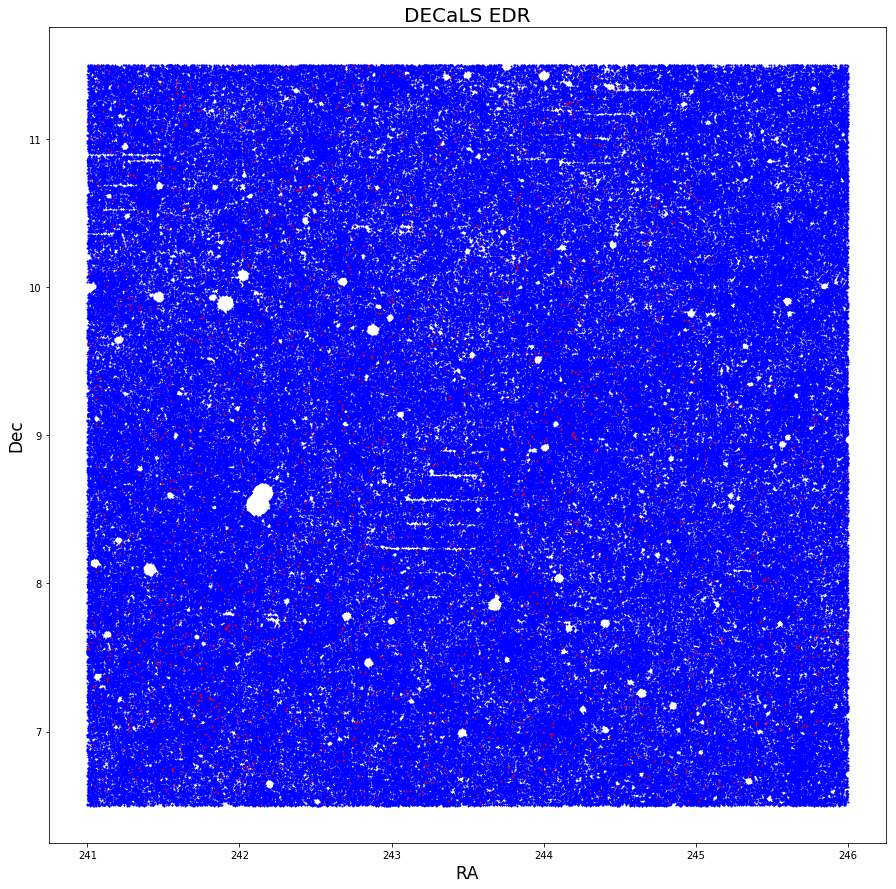

In [7]:
plt.scatter(ra_BKG, dec_BKG, s=1, color='blue')
plt.scatter(ra_LRG, dec_LRG, s=1, color='red')
plt.rcParams["figure.figsize"] = [15, 15]
plt.title('DECaLS EDR', fontsize=20)
plt.xlabel('RA', fontsize=17)
plt.ylabel('Dec', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/EDR_ra-dec_v2.pdf')
# plt.savefig('/Users/mtownsend/Desktop/EDR_ra-dec_v2.jpg')
plt.show()

In [8]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


In [27]:
print("minimum zmag: ", min(zmag))
print("maximum zmag: ", max(zmag))
print("minimum rzcolor: ", min(rzcolor))
print("maximum rzcolor: ", max(rzcolor))
print("minimum grcolor: ", min(grcolor))
print("maximum grcolor: ", max(grcolor))

rz_edges = []
a = min(rzcolor)
i = 0
rz_edges.append(a)
for i in range(49):
    a = a + 0.25
    rz_edges.append(a)
    i = i+1
    
print(len(rz_edges))
print(rz_edges)

print()
print()

zmag_edges = []
a = min(zmag)
i = 0
zmag_edges.append(a)
for i in range(49):
    a = a + 0.2
    zmag_edges.append(a)
    i = i+1
    
print(len(zmag_edges))
print(zmag_edges)


print()
print()

gr_edges = []
a = min(grcolor)
i = 0
gr_edges.append(a)
for i in range(49):
    a = a + 0.35
    gr_edges.append(a)
    i = i+1
    
print(len(gr_edges))
print(gr_edges)

minimum zmag:  13.22509
maximum zmag:  22.359999
minimum rzcolor:  -1.8027077
maximum rzcolor:  10.361477
minimum grcolor:  -6.5846786
maximum grcolor:  11.547377
50
[-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.697292327

In [35]:
# H1, edges = np.histogramdd((rzcolor, zmag, grcolor), bins=30, range=((min(rzcolor), 29.), (min(zmag), 35.), (min(grcolor), 34.)), density=False)
# H1, edges = np.histogramdd((rzcolor, zmag, grcolor), bins=50, density=False)
H1, nouse_edges = np.histogramdd((rzcolor, zmag, grcolor), bins=(rz_edges, zmag_edges, gr_edges), density=False)

edges = []
edges.append(rz_edges)
edges.append(zmag_edges)
edges.append(gr_edges)
# print(edges)
# print()
# print(edges[0])
# print()
# print(edges[1])
# print()
# print(edges[2])


# make 2D projections of 3D histogram
rz_v_zmag = H1[:, :, :].sum(axis=2)
rz_vs_zmag = np.fliplr(rz_v_zmag)
gr_v_zmag = H1[:, :, :].sum(axis=0)
gr_vs_zmag = np.flipud(gr_v_zmag.T)
gr_v_rz = H1[:, :, :].sum(axis=1)
gr_vs_rz = np.flipud(gr_v_rz.T)


# plt.figure(figsize=(10,10))

# cm = plt.cm.get_cmap('RdYlBu')
# sc = plt.scatter(zmag, rzcolor, c=grcolor, cmap=cm)
# plt.colorbar(sc)
# plt.gca().invert_xaxis()
# plt.show()

# print(edges[0])
# print(edges[1])
# print(edges[2])

# plt.scatter(zmag, rzcolor)
# plt.show()

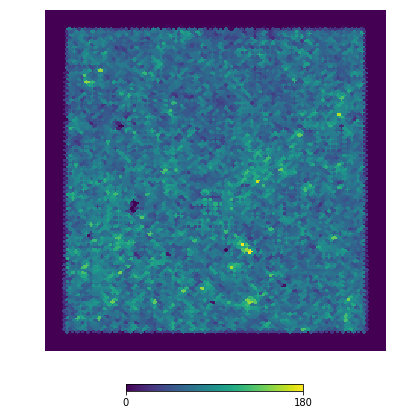

length phi:  519348


In [36]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [37]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, zmag_LRG, zmag_BKG, rzcolor_LRG, rzcolor_BKG, grcolor_LRG, grcolor_BKG, edges)

print('end nearNeighbor')


end nearNeighbor


mean number of near neighbors is 47.37410861217773
median number of near neighbors is 41.0
standard deviation of near neighbor is 23.851534505334982
standard error is 0.5587816536680068


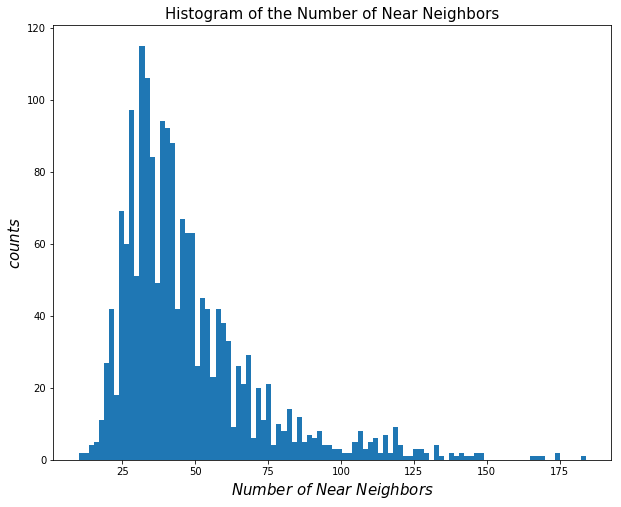

In [38]:
totalNear(near)

plt.show()


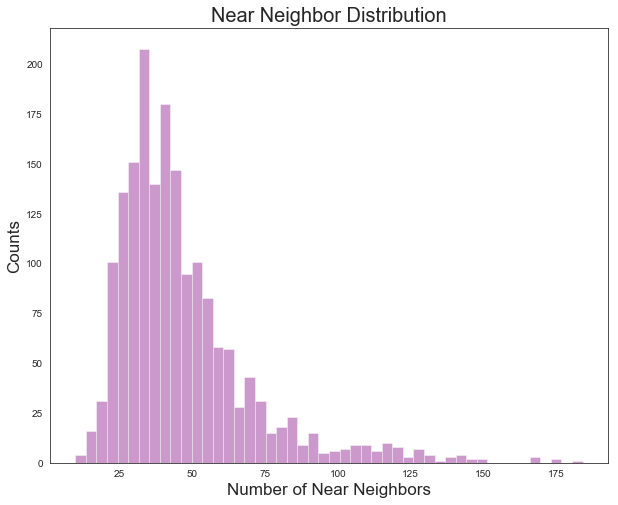

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style('white')

# Sum up number of near neighbors for every LRG
sumnear= []
for i in range(len(near)):
    sumnear.append(np.sum(near[i]))

sns.distplot(sumnear, kde=False, color='purple', axlabel='Number of Near Neighbors')
plt.title('Near Neighbor Distribution', fontsize=20)
plt.xlabel('Number of Near Neighbors', fontsize=17)
plt.ylabel('Counts', fontsize=17)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/nearNeighbor-dist_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/nearNeighbor-dist_v2.jpg')


In [39]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, zmag, rzcolor, grcolor, edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")


end bkg


mean number of interlopers is 36.4804761239963
median number of interlopers is 32.26296824728518
standard deviation of interloper is 17.29320070111316
standard error is 0.4051363354764178


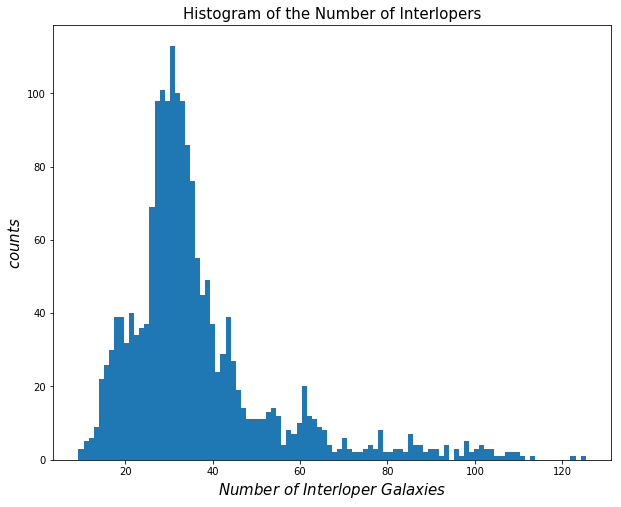

In [40]:
totalNbkg(Nbkg)

plt.show()

Nbkg = np.array(Nbkg)

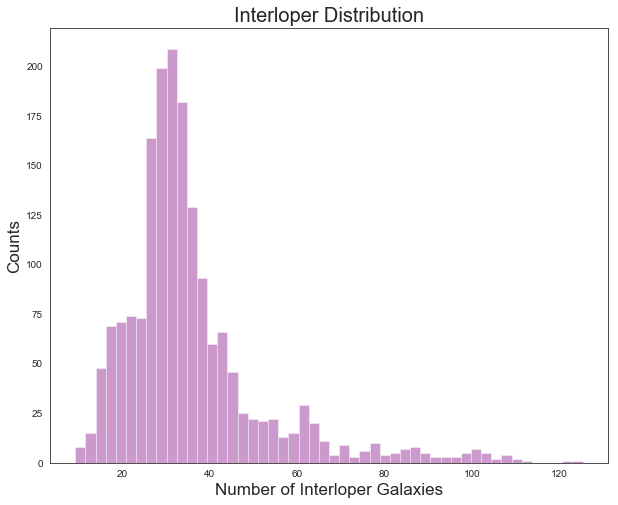

In [67]:
# Sum up number of near neighbors for every LRG
sumNbkg= []
for i in range(len(Nbkg)):
    sumNbkg.append(np.sum(Nbkg[i]))

sns.distplot(sumNbkg, kde=False, color='purple', axlabel='Number of Interloper Galaxies')
plt.title('Interloper Distribution', fontsize=20)
plt.xlabel('Number of Interloper Galaxies', fontsize=17)
plt.ylabel('Counts', fontsize=17)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/interloper-dist_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/interloper-dist_v2.jpg')

In [41]:
Nsat = np.array(near) - np.array(Nbkg)

print("end Nsat")

end Nsat


mean number of satellites is 10.893632488181433
median number of satellites is 8.594618015771369
standard deviation of satellites is 16.1073967791785
standard error is 0.377355922594536


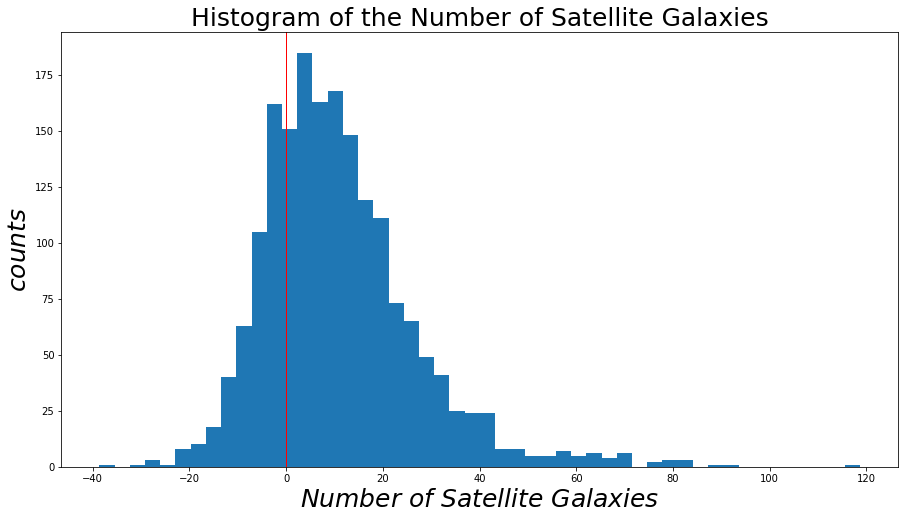

In [42]:
totalNsat(Nsat)

# plt.savefig('/Users/mtownsend/Desktop/Nsat.jpg')
plt.show()


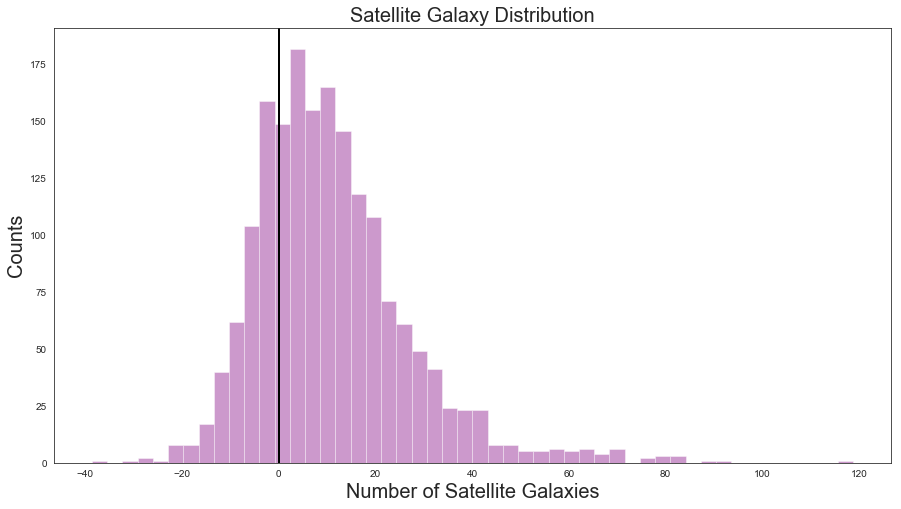

In [73]:
# Sum up number of near neighbors for every LRG
sumsat= []
for i in range(len(Nsat)):
    sumsat.append(np.sum(Nsat[i]))

plt.rcParams["figure.figsize"] = [15, 8]
sns.distplot(sumsat, kde=False, color='purple', axlabel='Number of Satellites')
plt.axvline(linewidth=2, color='black')
plt.title('Satellite Galaxy Distribution', fontsize=20)
plt.xlabel('Number of Satellite Galaxies', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/satellite-dist_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/satellite-dist_v2.jpg')
plt.show()

In [38]:
sumsat, sumsat1z, sumsat2z, sumsat3z, sumsat4z, sumsat5z, sumsat6z, sumsat7z, sumsat1r, sumsat2r, sumsat3r, sumsat4r, sumsat5r, sumsat6r, sumsat7r, sumsat1g, sumsat2g, sumsat3g, sumsat4g, sumsat5g, sumsat6g, sumsat7g, sumsat8g, sumsat1_zmag, sumsat2_zmag, sumsat3_zmag, sumsat4_zmag, sumsat5_zmag, sumsat6_zmag, sumsat7_zmag  = sumNsat(Nsat, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

# sumnear, sumnear1z, sumnear2z, sumnear3z, sumnear4z, sumnear5z, sumnear6z, sumnear7z, sumnear1r, sumnear2r, sumnear3r, sumnear4r, sumnear5r, sumnear6r, sumnear7r, sumnear1g, sumnear2g, sumnear3g, sumnear4g, sumnear5g, sumnear6g, sumnear7g, sumnear8g, sumnear1_zmag, sumnear2_zmag, sumnear3_zmag, sumnear4_zmag, sumnear5_zmag, sumnear6_zmag, sumnear7_zmag = sumNN(near, z_LRG, rmag_LRG, gmag_LRG, zmag_LRG)

# print(sumsat)

sumsat = np.array(sumsat)

1782
1823


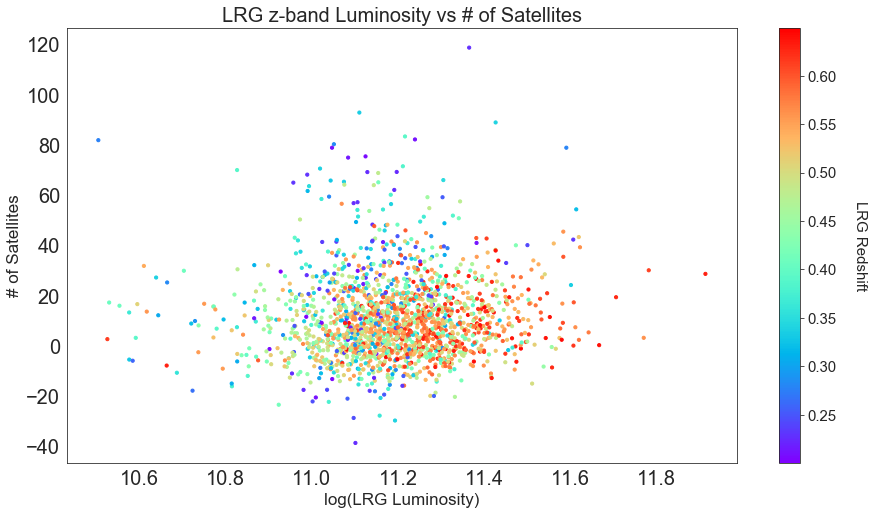

In [83]:
print(len(sumsat))
print(len(log_Lz))

# f, ax = plt.subplots(figsize=(15,15))
cm = plt.cm.get_cmap('rainbow')
# plt.scatter(mstar[idx], sumsat, c=z_LRG, s=10, cmap=cm)
plt.scatter(log_Lz[np.where(log_Lz > 10.5)], sumsat, c=z_LRG, s=10, cmap=cm)
plt.title('LRG z-band Luminosity vs # of Satellites', fontsize=20)
plt.xlabel('log(LRG Luminosity)', fontsize=17)
plt.ylabel('# of Satellites', fontsize=17)
plt.tick_params(labelsize=20)
# plt.xlim(10.75, 12.)
# plt.ylim(-40., 80.)
cb = plt.colorbar()
cb.set_label('LRG Redshift', rotation=270, fontsize=15, labelpad=30)
cb.ax.tick_params(labelsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/LRGluminosity-v-SatNum_withLRGredshift_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGredshift-v-SatNum_withLRGmass_v2.jpg')
plt.show()

In [84]:
def read_isedfit():
    """Read the iSEDfit fitting results."""
    
#     parentfile = '/Users/mtownsend/anaconda/Data/lrg-survey-dr8-try5.fits'
    isedfile = '/Users/mtownsend/Downloads/lrgs_dr8_ckc14z_kroupa01_charlot_sfhgrid01.fits'
#     kcorrfile = '/Users/mtownsend/anaconda/Data/lrgs_ckc14z_kroupa01_charlot_sfhgrid01_kcorr.z0.0.fits'

#     print('Reading {}'.format(parentfile))
#     parent = Table.read(parentfile)
    print('Reading {}'.format(isedfile))
    ised = Table.read(isedfile)
#     print('Reading {}'.format(kcorrfile))
#     kcorr = Table.read(kcorrfile)
    
    snrmin = 3.0
    chi2min = 10
    
    keep = np.where(
        (ised['CHI2'] < chi2min) * 
        (np.sum(ised['MAGGIES'] * np.sqrt(ised['IVARMAGGIES']) > snrmin, axis=1) == 5)
    )[0]
    print('Read {} galaxies with chi2 < {} and S/N > {} in all 5 photometric bands.'.format(
        len(keep), chi2min, snrmin))
    
#     cat = dict()
#     cat['weight'] = len(keep) * parent['COUNT'][keep].data / np.sum(parent['COUNT'][keep].data)
#     cat['redshift'] = kcorr['Z'][keep].data
#     cat['Mstar'] = ised['MSTAR_50'][keep].data
#     cat['Mg'] = kcorr['ABSMAG'][keep, 0].data
#     cat['Mr'] = kcorr['ABSMAG'][keep, 1].data
#     cat['Mz'] = kcorr['ABSMAG'][keep, 2].data
#     cat['gr'] = cat['Mg'] - cat['Mr']
#     cat['rz'] = cat['Mr'] - cat['Mz']

#     with np.errstate(invalid='ignore'):
#         cat['grobs'] = -2.5 * np.log10( ised['MAGGIES'][keep, 0].data / ised['MAGGIES'][keep, 1].data )
#         cat['rzobs'] = -2.5 * np.log10( ised['MAGGIES'][keep, 1].data / ised['MAGGIES'][keep, 2].data )
#         cat['zW1obs'] = -2.5 * np.log10( ised['MAGGIES'][keep, 2].data / ised['MAGGIES'][keep, 3].data )
     
    #mm = - 2.5 * np.log10(ised['MAGGIES'][keep, 0].data)
    #_ = plt.hist(mm, bins=100)
    
#     kcorr.remove_columns(['Z', 'ISEDFIT_ID', 'MAGGIES', 'IVARMAGGIES'])
    out = hstack([ised])
    
    return out

In [85]:
import os
import numpy as np
from astropy.table import Table, hstack
from scipy.spatial import cKDTree as KDTree

ised = read_isedfit()
ngal = len(ised)

Reading /Users/mtownsend/Downloads/lrgs_dr8_ckc14z_kroupa01_charlot_sfhgrid01.fits
Read 740800 galaxies with chi2 < 10 and S/N > 3.0 in all 5 photometric bands.


In [86]:
print(type(ised))

mstar = np.array(ised['MSTAR_50'])
print(type(mstar))
total_mass = np.array(ised['TOTALMASS'])

ra_MOUS = np.array(ised['RA'])
dec_MOUS = np.array(ised['DEC'])
mstar_err = np.array(ised['MSTAR_ERR'])
z_MOUS = np.array(ised['Z'])
print(len(ra_MOUS))
print(len(z_MOUS))

from astropy.coordinates import SkyCoord, match_coordinates_sky                                   
from astropy import units as u       

mous_cat = SkyCoord(ra=ra_MOUS*u.degree, dec=dec_MOUS*u.degree)                          

my_cat = SkyCoord(ra=ra_LRG*u.degree, dec=dec_LRG*u.degree)                                

idx, sep2d, dist3d = match_coordinates_sky(my_cat, mous_cat, nthneighbor=1)
# idx, sep2d, dist3d = my_cat.match_to_catalog_sky(mous_cat)

print(ra_LRG[1])
print(ra_MOUS[idx[1]])

print(dec_LRG[1])
print(dec_MOUS[idx[1]])

mass_LRG = mstar[idx]
print(len(mass_LRG))

ra_cut = ra_MOUS[np.where((z_MOUS >= 0.2) & (z_MOUS <= 0.65) & (ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
dec_cut = dec_MOUS[np.where((z_MOUS >= 0.2) & (z_MOUS <= 0.65) & (ra_MOUS >= 241) & (ra_MOUS <= 246) & (dec_MOUS >= 6.5) & (dec_MOUS <= 11.5))]
print(len(ra_cut))
print(len(ra_MOUS))


<class 'astropy.table.table.Table'>
<class 'numpy.ndarray'>
1078965
1078965
241.05811624717717
241.05811624717717
9.243933417459095
9.243933417459095
1782
1823
1078965


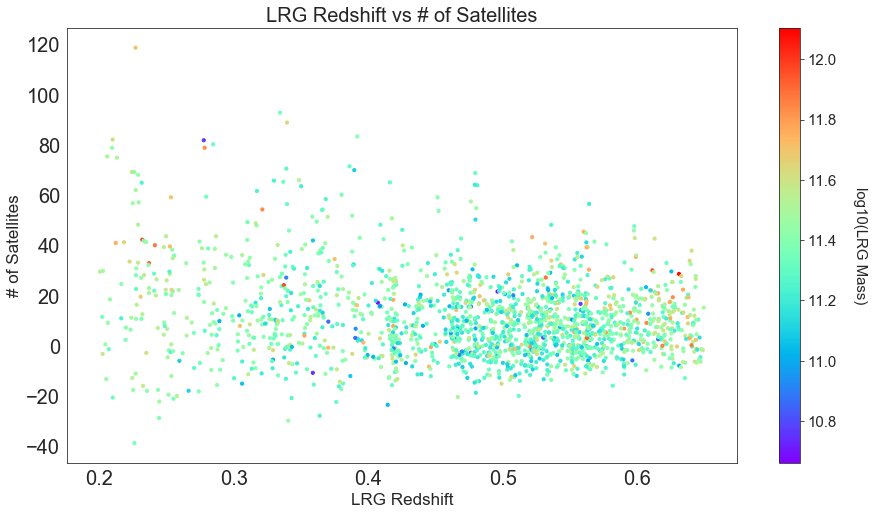

In [87]:
# f, ax = plt.subplots(figsize=(15,15))
cm = plt.cm.get_cmap('rainbow')
# plt.scatter(mstar[idx], sumsat, c=z_LRG, s=10, cmap=cm)
plt.scatter(z_LRG, sumsat, c=mstar[idx], s=10, cmap=cm)
plt.title('LRG Redshift vs # of Satellites', fontsize=20)
plt.xlabel('LRG Redshift', fontsize=17)
plt.ylabel('# of Satellites', fontsize=17)
plt.tick_params(labelsize=20)
# plt.xlim(10.75, 12.)
# plt.ylim(-40., 80.)
cb = plt.colorbar()
cb.set_label('log10(LRG Mass)', rotation=270, fontsize=15, labelpad=30)
cb.ax.tick_params(labelsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/LRGredshift-v-SatNum_withLRGmass_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGredshift-v-SatNum_withLRGmass_v2.jpg')
plt.show()

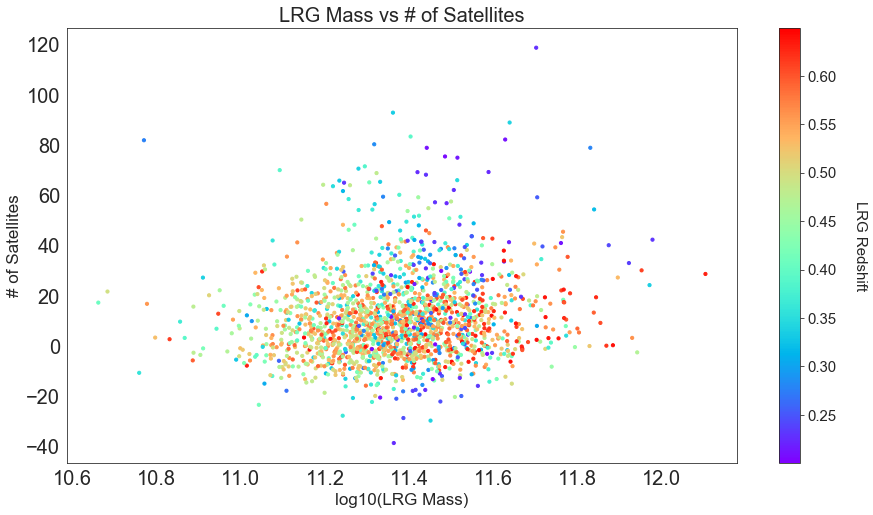

In [88]:
# f, ax = plt.subplots(figsize=(15,15))
cm = plt.cm.get_cmap('rainbow')
# plt.scatter(mstar[idx], sumsat, c=z_LRG, s=10, cmap=cm)
plt.scatter(mstar[idx], sumsat, c=z_LRG, s=10, cmap=cm)
plt.title('LRG Mass vs # of Satellites', fontsize=20)
plt.xlabel('log10(LRG Mass)', fontsize=17)
plt.ylabel('# of Satellites', fontsize=17)
plt.tick_params(labelsize=20)
# plt.xlim(10.75, 12.)
# plt.ylim(-40., 80.)
cb = plt.colorbar()
cb.set_label('LRG Redshift', rotation=270, fontsize=15, labelpad=30)
cb.ax.tick_params(labelsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/LRGmass-v-SatNum_withLRGredshift_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRGredshift-v-SatNum_withLRGmass_v2.jpg')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# sns.set(color_codes=True)


sumsat_zcut1 = sumsat[np.where((z_LRG >= 0.2) & (z_LRG < 0.25))]
sumsat_zcut2 = sumsat[np.where((z_LRG >= 0.25) & (z_LRG < 0.3))]
sumsat_zcut3 = sumsat[np.where((z_LRG >= 0.3) & (z_LRG < 0.35))]
sumsat_zcut4 = sumsat[np.where((z_LRG >= 0.35) & (z_LRG < 0.4))]
sumsat_zcut5 = sumsat[np.where((z_LRG >= 0.4) & (z_LRG < 0.45))]
sumsat_zcut6 = sumsat[np.where((z_LRG >= 0.45) & (z_LRG < 0.5))]
sumsat_zcut7 = sumsat[np.where((z_LRG >= 0.5) & (z_LRG < 0.55))]
sumsat_zcut8 = sumsat[np.where((z_LRG >= 0.55) & (z_LRG < 0.6))]
sumsat_zcut9 = sumsat[np.where((z_LRG >= 0.6) & (z_LRG <= 0.65))]


print(len(sumsat_zcut1))
print(len(sumsat_zcut2))
print(len(sumsat_zcut3))
print(len(sumsat_zcut4))
print(len(sumsat_zcut5))
print(len(sumsat_zcut6))
print(len(sumsat_zcut7))
print(len(sumsat_zcut8))
print(len(sumsat_zcut9))

# sdsat_zcut1 = np.std(sumsat_zcut1)
# sdsat_zcut2 = np.std(sumsat_zcut2)
# sdsat_zcut3 = np.std(sumsat_zcut3)
# sdsat_zcut4 = np.std(sumsat_zcut4)
# sdsat_zcut5 = np.std(sumsat_zcut5)
# sdsat_zcut6 = np.std(sumsat_zcut6)
# sdsat_zcut7 = np.std(sumsat_zcut7)
# sdsat_zcut8 = np.std(sumsat_zcut8)
# sdsat_zcut9 = np.std(sumsat_zcut9)

# # cut = (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG1 <= 22.36)
# # g_sigma_LRG_cut = g_sigma_LRG[cut]
# # r_sigma_LRG_cut = r_sigma_LRG[cut]
# # z_sigma_LRG_cut = z_sigma_LRG[cut]

# g_sigma_zcut1 = g_sigma[np.where((z_LRG >= 0.2) & (z_LRG < 0.25))]
# g_sigma_zcut2 = g_sigma[np.where((z_LRG >= 0.25) & (z_LRG < 0.3))]
# g_sigma_zcut3 = g_sigma[np.where((z_LRG >= 0.3) & (z_LRG < 0.35))]
# g_sigma_zcut4 = g_sigma[np.where((z_LRG >= 0.35) & (z_LRG < 0.4))]
# g_sigma_zcut5 = g_sigma[np.where((z_LRG >= 0.4) & (z_LRG < 0.45))]
# g_sigma_zcut6 = g_sigma[np.where((z_LRG >= 0.45) & (z_LRG < 0.5))]
# g_sigma_zcut7 = g_sigma[np.where((z_LRG >= 0.5) & (z_LRG < 0.55))]
# g_sigma_zcut8 = g_sigma[np.where((z_LRG >= 0.55) & (z_LRG < 0.6))]
# g_sigma_zcut9 = g_sigma[np.where((z_LRG >= 0.6) & (z_LRG <= 0.65))]

# r_sigma_zcut1 = r_sigma[np.where((z_LRG >= 0.2) & (z_LRG < 0.25))]
# r_sigma_zcut2 = r_sigma[np.where((z_LRG >= 0.25) & (z_LRG < 0.3))]
# r_sigma_zcut3 = r_sigma[np.where((z_LRG >= 0.3) & (z_LRG < 0.35))]
# r_sigma_zcut4 = r_sigma[np.where((z_LRG >= 0.35) & (z_LRG < 0.4))]
# r_sigma_zcut5 = r_sigma[np.where((z_LRG >= 0.4) & (z_LRG < 0.45))]
# r_sigma_zcut6 = r_sigma[np.where((z_LRG >= 0.45) & (z_LRG < 0.5))]
# r_sigma_zcut7 = r_sigma[np.where((z_LRG >= 0.5) & (z_LRG < 0.55))]
# r_sigma_zcut8 = r_sigma[np.where((z_LRG >= 0.55) & (z_LRG < 0.6))]
# r_sigma_zcut9 = r_sigma[np.where((z_LRG >= 0.6) & (z_LRG <= 0.65))]

# z_sigma_zcut1 = z_sigma[np.where((z_LRG >= 0.2) & (z_LRG < 0.25))]
# z_sigma_zcut2 = z_sigma[np.where((z_LRG >= 0.25) & (z_LRG < 0.3))]
# z_sigma_zcut3 = z_sigma[np.where((z_LRG >= 0.3) & (z_LRG < 0.35))]
# z_sigma_zcut4 = z_sigma[np.where((z_LRG >= 0.35) & (z_LRG < 0.4))]
# z_sigma_zcut5 = z_sigma[np.where((z_LRG >= 0.4) & (z_LRG < 0.45))]
# z_sigma_zcut6 = z_sigma[np.where((z_LRG >= 0.45) & (z_LRG < 0.5))]
# z_sigma_zcut7 = z_sigma[np.where((z_LRG >= 0.5) & (z_LRG < 0.55))]
# z_sigma_zcut8 = z_sigma[np.where((z_LRG >= 0.55) & (z_LRG < 0.6))]
# z_sigma_zcut9 = z_sigma[np.where((z_LRG >= 0.6) & (z_LRG <= 0.65))]


# print(len(sumsat_zcut1))
# print(len(g_sigma_zcut1))


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# print(np.median(sumsat_zcut1))
# totalNsat(sumsat_zcut1)
# # plt.savefig('/Users/mtownsend/Desktop/Nsat-zcut1.jpeg')
# plt.show()

# sns.distplot(sumsat_zcut1, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.2 < z < 0.25', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut1_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut1_v3.jpg')

# print(np.median(sumsat_zcut2))
# totalNsat(sumsat_zcut2)
# # plt.savefig('/Users/mtownsend/Desktop/Nsat-zcut2.jpeg')
# plt.show()

# sns.distplot(sumsat_zcut2, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.25 < z < 0.3', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut2_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut2_v3.jpg')

# print(np.median(sumsat_zcut3))
# totalNsat(sumsat_zcut3)
# # plt.savefig('/Users/mtownsend/Desktop/Nsat-zcut3.jpeg')
# plt.show()

# sns.distplot(sumsat_zcut3, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.3 < z < 0.35', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut3_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut3_v3.jpg')

# # print(np.median(sumsat_zcut4))
# totalNsat(sumsat_zcut4)
# # plt.savefig('/Users/mtownsend/Desktop/Nsat-zcut4.jpeg')
# plt.show()

# sns.distplot(sumsat_zcut4, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.35 < z < 0.4', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut4_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut4_v3.jpg')

# # print(np.median(sumsat_zcut5))
# totalNsat(sumsat_zcut5)
# # plt.savefig('/Users/mtownsend/Desktop/Nsat-zcut5.jpeg')
# plt.show()

# sns.distplot(sumsat_zcut5, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.4 < z < 0.45', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut5_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut5_v3.jpg')

# sns.distplot(sumsat_zcut6, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.45 < z < 0.5', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut6_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut6_v3.jpg')

# sns.distplot(sumsat_zcut7, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.5 < z < 0.55', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut7_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut7_v3.jpg')

# sns.distplot(sumsat_zcut8, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.55 < z < 0.6', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut8_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut8_v3.jpg')

# sns.distplot(sumsat_zcut9, kde=False, color='purple')
# plt.title('Satellite Galaxy Distribution, 0.6 < z < 0.65', fontsize=20)
# plt.xlabel('Number of Satellites', fontsize=17)
# plt.ylabel('Counts', fontsize=17)
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut9_v3.pdf')
# plt.savefig('/Users/mtownsend/Desktop/Nsat-dist-zcut9_v3.jpg')



Nsat_avg = np.array([np.mean(sumsat_zcut1), np.mean(sumsat_zcut2), np.mean(sumsat_zcut3), np.mean(sumsat_zcut4), np.mean(sumsat_zcut5), np.mean(sumsat_zcut6), np.mean(sumsat_zcut7), np.mean(sumsat_zcut8), np.mean(sumsat_zcut9)])
redshift_bin = np.array([0.23, 0.28, 0.33, 0.38, 0.43, 0.48, 0.53, 0.58, 0.63])
sdsumsat = [sdsat_zcut1, sdsat_zcut2, sdsat_zcut3, sdsat_zcut4, sdsat_zcut5, sdsat_zcut6, sdsat_zcut7, sdsat_zcut8, sdsat_zcut9]
# sterrsumsat = [stats.sem(sumsat_zcut1), stats.sem(sumsat_zcut2), stats.sem(sumsat_zcut3), stats.sem(sumsat_zcut4), stats.sem(sumsat_zcut5), stats.sem(sumsat_zcut6), stats.sem(sumsat_zcut7), stats.sem(sumsat_zcut8), stats.sem(sumsat_zcut9), stats.sem(sumsat_zcut10)]


# y_pos = np.arange(len(redshift_bin))
# performance = Nsat_avg

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, redshift_bin, fontsize=20)
# plt.ylabel('Mean Number of Satellites', fontsize=20)
# plt.title('Mean Number of Satellites in Redshift Bins', fontsize=25)
# # plt.savefig('/Users/mtownsend/Desktop/meanNsat_redshift_bins_bar_v1.pdf')
# # plt.savefig('/Users/mtownsend/Desktop/meanNsat_redshift_bins_bar_v1.jpg')

# plt.show()

# plt.errorbar(redshift_bin, Nsat_avg, yerr=sdsumsat, color='purple', fmt='o')
plt.scatter(redshift_bin, Nsat_avg, color='purple', s=200)
plt.rcParams["figure.figsize"] = [15, 7.5]
# plt.title('Mean Number of Satellites by Redshift', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.xlabel(r'$Redshift$', fontsize=20)
# plt.ylabel(r'$Mean$ $Satellite$', fontsize=20)
# plt.savefig('/Users/mtownsend/Desktop/meanNsat_redshift_bins_scatter_v1.pdf')
plt.savefig('/Users/mtownsend/Desktop/meanNsat_redshift_bins_scatter_v1_nolabels.jpg')

plt.show()

print(sdsat_zcut1)
print(sdsat_zcut2)
print(sdsat_zcut3)
print(sdsat_zcut4)
print(sdsat_zcut5)
print(sdsat_zcut6)
print(sdsat_zcut7)
print(sdsat_zcut8)
print(sdsat_zcut9)

print('----')

print(stats.sem(sumsat_zcut1))
print(stats.sem(sumsat_zcut2))
print(stats.sem(sumsat_zcut3))
print(stats.sem(sumsat_zcut4))
print(stats.sem(sumsat_zcut5))
print(stats.sem(sumsat_zcut6))
print(stats.sem(sumsat_zcut7))
print(stats.sem(sumsat_zcut8))
print(stats.sem(sumsat_zcut9))


In [18]:
# Divvy up by redshift slice

Nsat_zcut1 = Nsat[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))]
Nsat_zcut2 = Nsat[np.where((z_LRG >= 0.3) & (z_LRG < 0.4))]
Nsat_zcut3 = Nsat[np.where((z_LRG >= 0.4) & (z_LRG < 0.5))]
Nsat_zcut4 = Nsat[np.where((z_LRG >= 0.5) & (z_LRG < 0.6))]
Nsat_zcut5 = Nsat[np.where((z_LRG >= 0.6) & (z_LRG < 0.65))]


print(len(Nsat_zcut1))
print(len(Nsat_zcut2))
print(len(Nsat_zcut3))
print(len(Nsat_zcut4))
print(len(Nsat_zcut5))


173
264
489
711
186


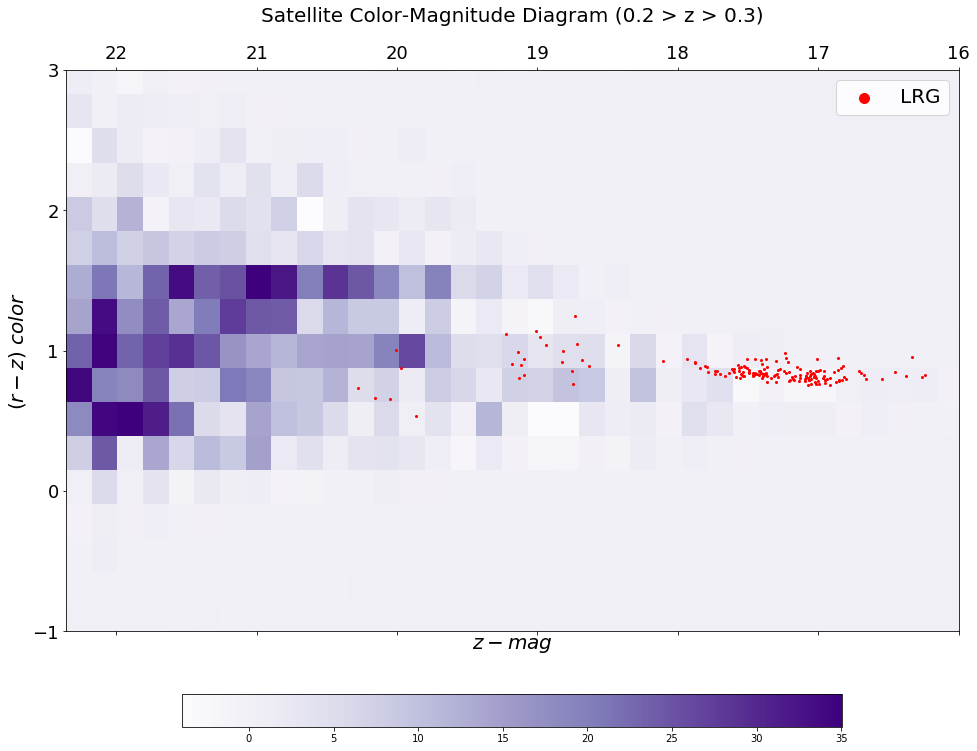

In [35]:
def cmdHistograms(H, edges):

    # This function plots a color-magnitude 2D histogram for satellites around LRG; produces a histogram for every LRG

    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import colors

    plt.rcParams.update({'figure.max_open_warning': 0})

    rz_zmag_sum = list(np.zeros((50,50)))
    gr_zmag_sum = list(np.zeros((50,50)))
    gr_rz_sum = list(np.zeros((50,50)))
    for i in range(len(H)):
        # make 2D projections of 3D histogram
        rz_v_zmag = H[i][:, :, :].sum(axis=2)
        rz_vs_zmag = np.flipud(rz_v_zmag)
        rz_zmag_sum = np.add(rz_zmag_sum, rz_vs_zmag)
        gr_v_zmag = H[i][:, :, :].sum(axis=0)
        gr_vs_zmag = np.flipud(gr_v_zmag.T)
        gr_zmag_sum = np.add(gr_zmag_sum, gr_vs_zmag)
        gr_v_rz = H[i][:, :, :].sum(axis=1)
        gr_vs_rz = np.flipud(gr_v_rz.T)
        gr_rz_sum = np.add(gr_rz_sum, gr_vs_rz)
        

        # plot 2D histograms using matshow; 3 plots per image
#         f, axarr = plt.subplots(111, figsize=(10, 10))
#         f.suptitle("Satellite Density CMD (LRG {})".format(i))

    plt.rcParams["figure.figsize"] = [40, 20]
    im1 = plt.matshow(rz_zmag_sum, cmap=plt.cm.Purples, norm=colors.Normalize(), extent=[edges[1][0], edges[1][len(edges[1]) - 1], edges[0][0], edges[0][len(edges[0]) - 1]])
    plt.scatter(zmag_LRG[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], rzcolor_LRG[np.where((z_LRG >= 0.2) & (z_LRG < 0.3))], s=4, color='red', label="LRG")
    plt.title("Satellite Color-Magnitude Diagram (0.2 > z > 0.3)".format(i), fontsize=20, pad=20)
#         plt.xaxis.set_ticks_position('bottom')
#         plt.invert_xaxis()
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    plt.gca().invert_xaxis()
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlim(22.36, 16)
    plt.ylim(-1, 3)
#         plt.set(xlabel='zmag', ylabel='(r-z)')
#         plt.set_ylim(bottom=-5, top=5)
    plt.colorbar(im1, orientation="horizontal", fraction=0.037, pad=0.07)
#         s = 'LRG redshift: {0:.2f}'.format(z_LRG[i])
#         t = 'LRG coords: {:.2f}, {:.2f}'.format(ra_LRG[i], dec_LRG[i])
#         plt.text(16, -2, s, family='sans-serif', fontsize=14)
#         plt.text(16, -2.5, t, family='sans-serif', fontsize=14)
#         axarr[0].title("Satellite Color-Magnitude Diagram (LRG {})".format(i), fontsize=15)
    plt.xlabel(r'$z-mag$', fontsize=20)
    plt.ylabel(r'$(r-z)$ $color$', fontsize=20)
    plt.legend(loc='upper right', prop={'size': 20}, markerscale=5.0)

        # save image with incrementing file name
#     plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/satHistCMD-zslice1_v3.jpeg'.format(i))    
    plt.show()
    
# cmdHistograms(Nsat_zcut1, edges)
# cmdHistograms(Nsat_zcut2, edges)
# cmdHistograms(Nsat_zcut3, edges)
# cmdHistograms(Nsat_zcut4, edges)
cmdHistograms(Nsat_zcut5, edges)


# sns.jointplot(Nsat_zcut5, edges, kind="hex", color="#4CB391")


In [15]:
import seaborn as sns; sns.set_style('white')
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 15]
sns.distplot(Mr, bins=40, kde=False, color='indigo')
# plt.title('Satellite Galaxy Distribution', fontsize=20)
plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=50)
# plt.xlabel('$M_{r}$', fontsize=20)
# plt.ylabel('Counts', fontsize=20)
# plt.savefig('/Users/mtownsend/Desktop/LRG-absmag-dist_v2.pdf')
# plt.savefig('/Users/mtownsend/Desktop/LRG-absmag-dist_v2.jpg')
plt.show()

# plt.rcParams["figure.figsize"] = [20, 15]
# sns.distplot(z_LRG, bins=40, kde=False, color='purple')
# # plt.title('LRG Redshift Distribution', fontsize=25)
# # plt.xlabel('Number of Satellites', fontsize=20)
# # plt.ylabel('Counts', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=50)
# # plt.savefig('/Users/mtownsend/Desktop/z_LRGdist_nolabel.jpg')
# # plt.savefig('/Users/mtownsend/Desktop/z_LRGdist_v2.pdf')

In [16]:
print(len(z_LRG[np.where(Mr > -20.5)]))

# plt.rcParams["figure.figsize"] = [20, 15]
# sns.distplot(z_LRG[np.where(Mr > -20.5)], bins=20, kde=False, color='purple')
# plt.title('LRG Redshift Distribution, Mr > -20.5', fontsize=25)
# # plt.xlabel('Number of Satellites', fontsize=20)
# # plt.ylabel('Counts', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=30)
# plt.savefig('/Users/mtownsend/Desktop/z_LRGdist_faint_v1.jpg')
# plt.savefig('/Users/mtownsend/Desktop/z_LRGdist_faint_v1.pdf')


plt.rcParams["figure.figsize"] = [20, 15]
sns.distplot(Mr[np.where(Mr > -20.5)], bins=20, kde=False, color='purple')
plt.title('LRG Mr Distribution, Mr > -20.5', fontsize=25)
# plt.xlabel('Number of Satellites', fontsize=20)
# plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.gca().invert_xaxis()
plt.savefig('/Users/mtownsend/Desktop/LRG_Mr_dist_faint_v1.jpg')
plt.savefig('/Users/mtownsend/Desktop/LRG_Mr_dist_faint_v1.pdf')

1823
1823
1823
1823
-23.19251965045929
-18.532380319833756


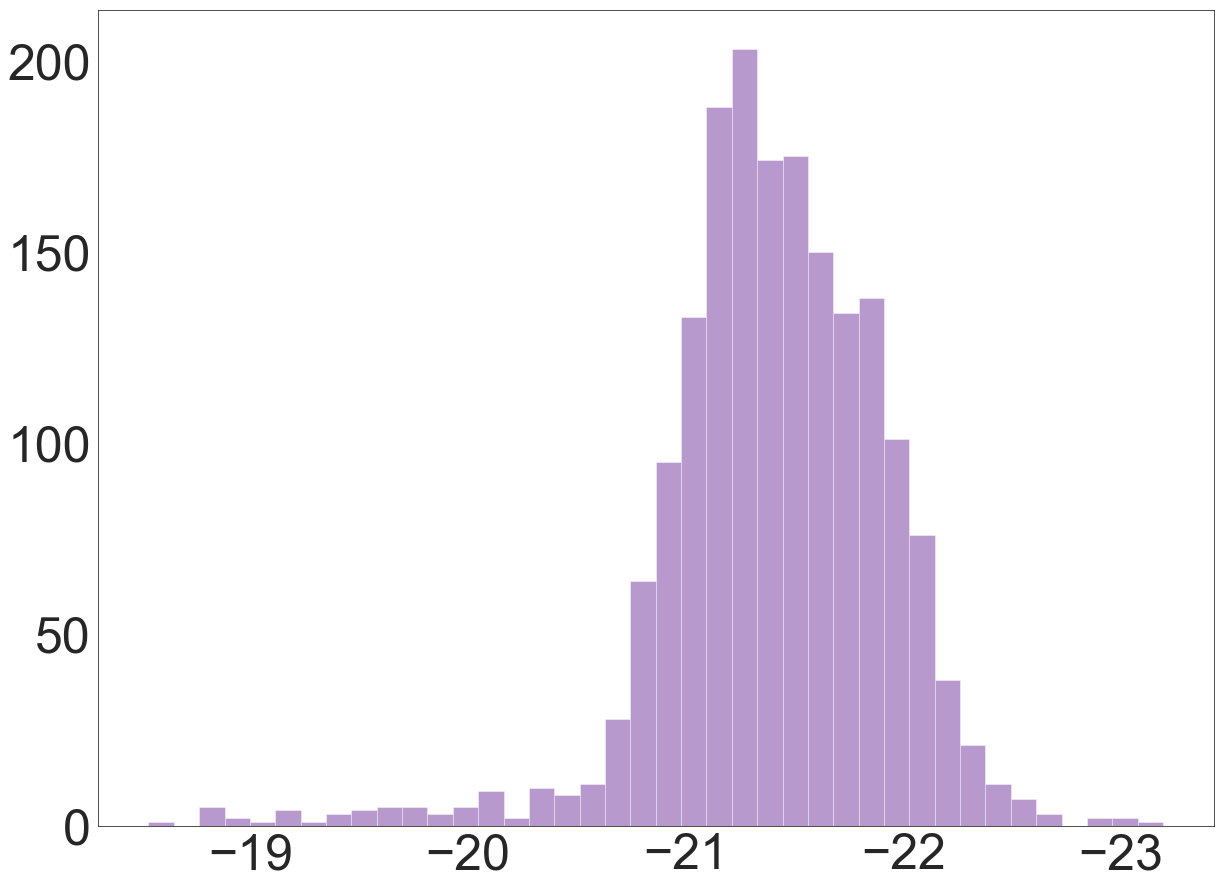

66


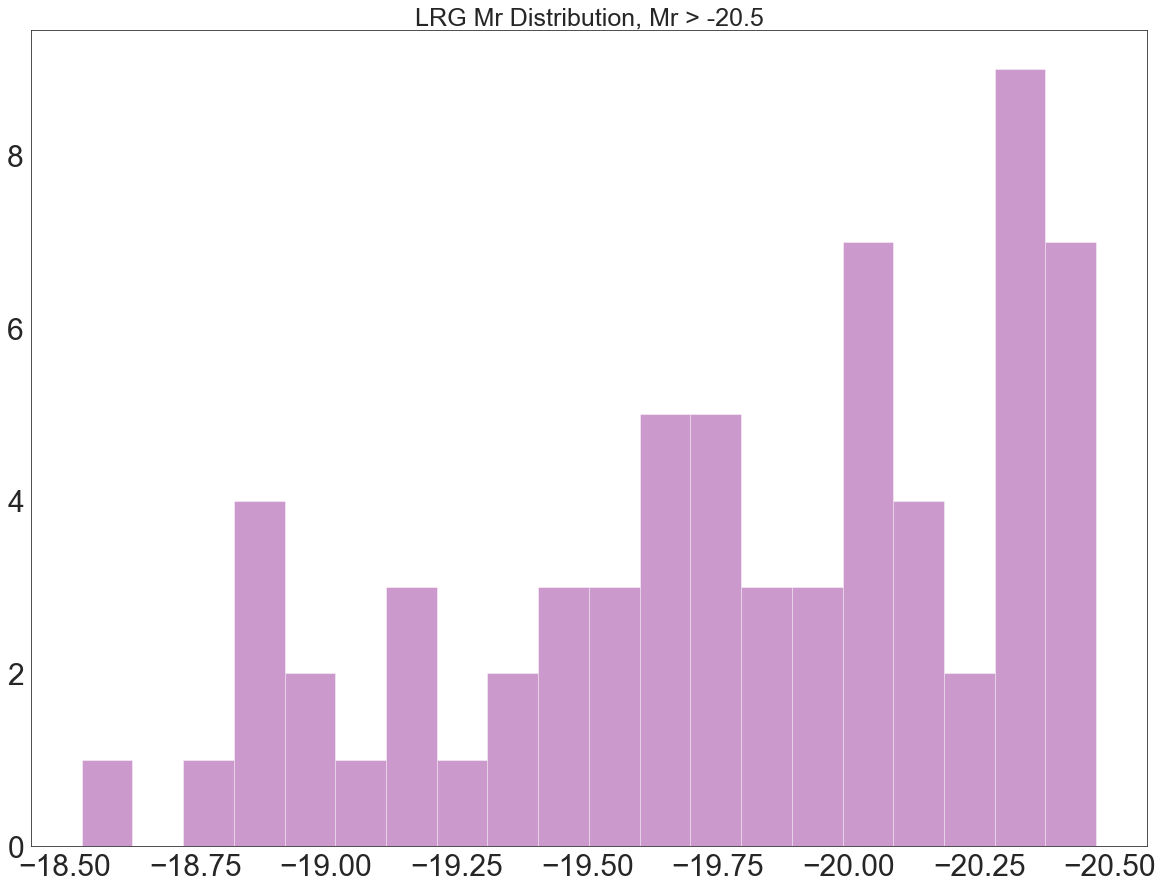

In [19]:
from makeCutoutTableFunc import *

htmlstr = make_cutout_comparison_table(ra_LRG[np.where(Mr > -20.5)], dec_LRG[np.where(Mr > -20.5)], id_LRG1[np.where(Mr > -20.5)], z_LRG[np.where(Mr > -20.5)], plate_LRG[np.where(Mr > -20.5)], fiberid_LRG[np.where(Mr > -20.5)])

Html_file= open("/Users/mtownsend/Desktop/faint_mag_cutouts.html","w")
Html_file.write(htmlstr)
Html_file.close()


In [ ]:
import seaborn as sns; sns.set_style('white')
import matplotlib.pyplot as plt


sns.set(font_scale=2, style='white')
h = sns.jointplot(Mr, sumsat, color="purple", height=10, kind='hex')

# JointGrid has a convenience function
# h.set_axis_labels('$M_r$', 'Number of Satellites', fontsize=25)
# h.colorbar()
h.fig.axes[0].invert_xaxis()

# or set labels via the axes objects
# h.ax_joint.set_xlabel('new x label', fontweight='bold')

# # also possible to manipulate the histogram plots this way, e.g.
# h.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

# plt.savefig('/Users/mtownsend/Desktop/Mr_vs_Nsat_wHist_v3_nolabel.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/Mr_vs_Nsat_wHist_v3.pdf')


# cmap = sns.cubehelix_palette(as_cmap=True)

# f, ax = plt.subplots(figsize=(15,15))
# points = ax.scatter(Mr, sumsat, s=10, color='purple')
# plt.gca().invert_xaxis()
# plt.title("LRG Absolute Magnitude vs Number of Satellites", fontsize=25)
# plt.ylabel(r'$Number$ $of$ $Satellites$', fontsize=23)
# plt.xlabel(r'$M_r$', fontsize=23)
# plt.tick_params(axis='both', which='major', labelsize=20)
# # f.colorbar(points)
# # plt.savefig('/Users/mtownsend/Desktop/Mr_vs_Nsat_v2.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/Mr_vs_Nsat_v2.pdf')
# plt.show()

In [ ]:
import seaborn as sns; sns.set_style('white')
import matplotlib.pyplot as plt


sns.set(font_scale=2, style='white')
h = sns.jointplot(z_LRG, sumsat, color="purple", height=10, kind='hex')

# JointGrid has a convenience function
# h.set_axis_labels('Redshift', 'Number of Satellites', fontsize=25)
# h.fig.axes[0].invert_xaxis()

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

plt.savefig('/Users/mtownsend/Desktop/redshift_vs_Nsat_wHist_v1_nolabel.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/Mr_vs_Nsat_wHist_v3.pdf')

In [ ]:
from scipy import stats

sumsat_Mrcut1 = sumsat[np.where((Mr <= -18.5) & (Mr > -19.5))]
sumsat_Mrcut2 = sumsat[np.where((Mr <= -19.5) & (Mr > -20.5))]
sumsat_Mrcut3 = sumsat[np.where((Mr <= -20.5) & (Mr > -21.5))]
sumsat_Mrcut4 = sumsat[np.where((Mr <= -21.5) & (Mr > -22.5))]
sumsat_Mrcut5 = sumsat[np.where((Mr <= -22.5) & (Mr > -23.5))]

sdsat_Mrcut1 = np.std(sumsat_Mrcut1)
sdsat_Mrcut2 = np.std(sumsat_Mrcut2)
sdsat_Mrcut3 = np.std(sumsat_Mrcut3)
sdsat_Mrcut4 = np.std(sumsat_Mrcut4)
sdsat_Mrcut5 = np.std(sumsat_Mrcut5)


print(len(sumsat_Mrcut1))
print(len(sumsat_Mrcut2))
print(len(sumsat_Mrcut3))
print(len(sumsat_Mrcut4))
print(len(sumsat_Mrcut5))

Nsat_avg = np.array([np.mean(sumsat_Mrcut1), np.mean(sumsat_Mrcut2), np.mean(sumsat_Mrcut3), np.mean(sumsat_Mrcut4), np.mean(sumsat_Mrcut4)])
Mr_bin = [-19, -20, -21, -22, -23]
sdsumsat = [sdsat_Mrcut1, sdsat_Mrcut2, sdsat_Mrcut3, sdsat_Mrcut4, sdsat_Mrcut5]
# sterrsumsat = [stats.sem(sumsat_zcut1), stats.sem(sumsat_zcut2), stats.sem(sumsat_zcut3), stats.sem(sumsat_zcut4), stats.sem(sumsat_zcut5), stats.sem(sumsat_zcut6), stats.sem(sumsat_zcut7), stats.sem(sumsat_zcut8), stats.sem(sumsat_zcut9), stats.sem(sumsat_zcut10)]


# y_pos = np.arange(len(Mr_bin))
# performance = Nsat_avg

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, Mr_bin, fontsize=20)
# plt.ylabel('Mean Number of Satellites', fontsize=20)
# plt.title('Mean Number of Satellites in Absolute Magnitude Bins', fontsize=25)
# plt.savefig('/Users/mtownsend/Desktop/meanNsat_Mr_bins_bar_v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/meanNsat_Mr_bins_bar_v1.jpg')

# plt.show()

# plt.errorbar(Mr_bin, Nsat_avg, yerr=sdsumsat, color='purple', fmt='o')
plt.scatter(Mr_bin, Nsat_avg, color='purple', s=200)
plt.rcParams["figure.figsize"] = [15, 7.5]
# plt.title('Mean Number of Satellites by Absolute Magnitude', fontsize=25)
# plt.xlabel(r'$M_r$', fontsize=20)
# plt.ylabel(r'$Mean$ $Satellite$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/meanNsat_Mr_bins_scatter_v1.pdf')
plt.savefig('/Users/mtownsend/Desktop/meanNsat_Mr_bins_scatter_v1_nolabels.jpg')

plt.show()


print(sdsat_Mrcut1)
print(sdsat_Mrcut2)
print(sdsat_Mrcut3)
print(sdsat_Mrcut4)
print(sdsat_Mrcut5)

print('----')

print(stats.sem(sumsat_Mrcut1))
print(stats.sem(sumsat_Mrcut2))
print(stats.sem(sumsat_Mrcut3))
print(stats.sem(sumsat_Mrcut4))
print(stats.sem(sumsat_Mrcut5))
